<a href="https://colab.research.google.com/github/mariluvarela/Clases-de-Ciencia-de-Datos/blob/main/Mtcars_Regresion_Univariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión Univariada con Python**

La idea es tomar un conjunto de datos (*mtcars*) en un dataframe y realizar una regresion lineal con sus supuestos, repasando tambien nociones de correlacion.

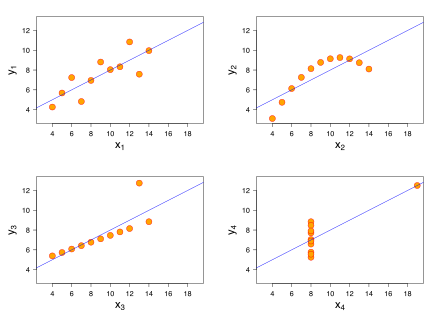

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import shapiro
import pylab

import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as smf
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Los datos fueron extraídos de la Motor Trend US magazine (1974), y contiene datos de consumo de combustible, diseño y desempeño de 32 automóviles (modelos 1973-74).

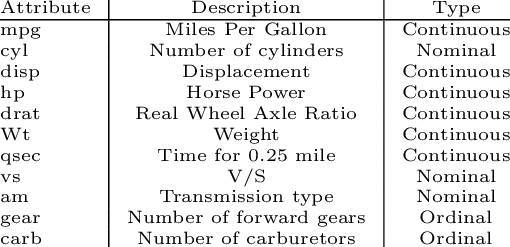

In [ ]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/mtcars.csv'

df = pd.read_csv(url) # Tomamos el dataset original
print(df.shape)
df.head()

(32, 12)


,manufacturer,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
df['mpg'].mean()

np.float64(20.090625000000003)

In [ ]:
df['mpg'].quantile(0.25)

np.float64(15.425)

## **Acceso al dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  32 non-null     object 
 1   mpg           32 non-null     float64
 2   cyl           32 non-null     int64  
 3   disp          32 non-null     float64
 4   hp            32 non-null     int64  
 5   drat          32 non-null     float64
 6   wt            32 non-null     float64
 7   qsec          32 non-null     float64
 8   vs            32 non-null     int64  
 9   am            32 non-null     int64  
 10  gear          32 non-null     int64  
 11  carb          32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [ ]:
df.columns

Index(['manufacturer', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [ ]:
# Restringimos solo a las variables numéricas
numeric_cols = ['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']
data = df[numeric_cols] # Subseting
data.head(10)

,mpg,disp,hp,drat,wt,qsec
0,21.0,160.0,110,3.90,2.620,16.46
1,21.0,160.0,110,3.90,2.875,17.02
2,22.8,108.0,93,3.85,2.320,18.61
3,21.4,258.0,110,3.08,3.215,19.44
4,18.7,360.0,175,3.15,3.440,17.02
5,18.1,225.0,105,2.76,3.460,20.22
6,14.3,360.0,245,3.21,3.570,15.84
7,24.4,146.7,62,3.69,3.190,20.00
8,22.8,140.8,95,3.92,3.150,22.90
9,19.2,167.6,123,3.92,3.440,18.30


## **Visualización**

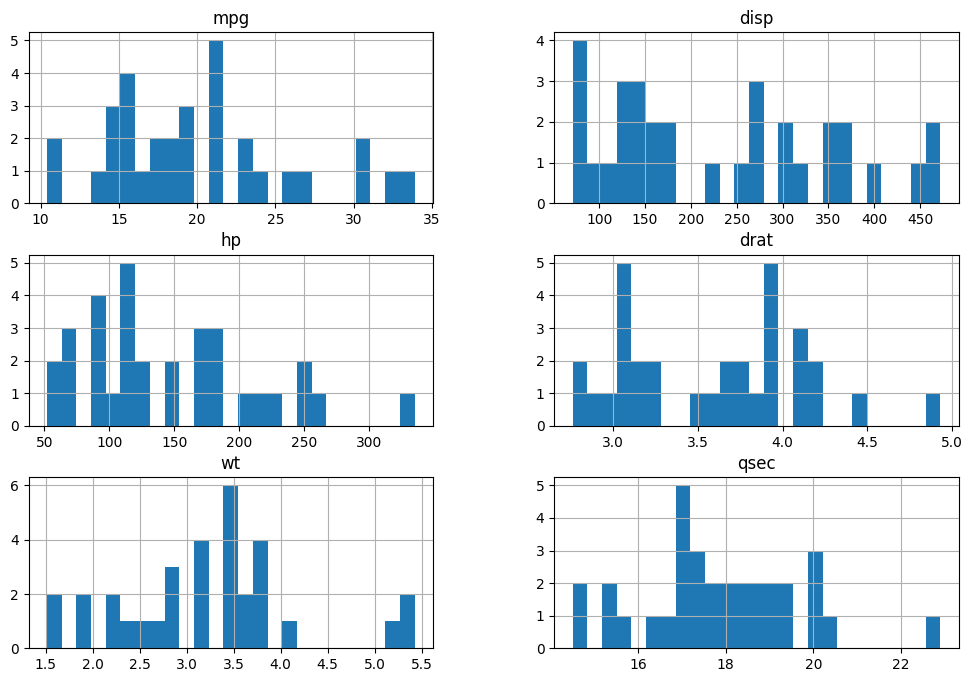

In [ ]:
# Distribucion de valores en histogramas
data.hist(bins=25, figsize=(12,8))
plt.show()

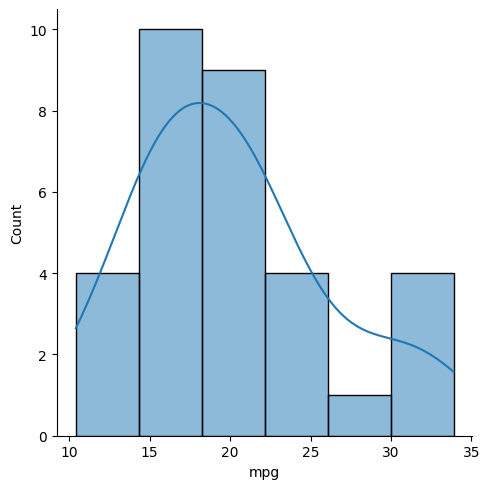

In [ ]:
sns.displot(data['mpg'], kde=True)
plt.show()

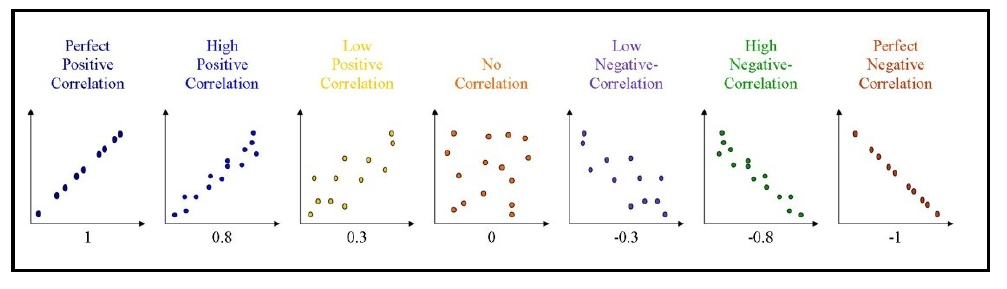

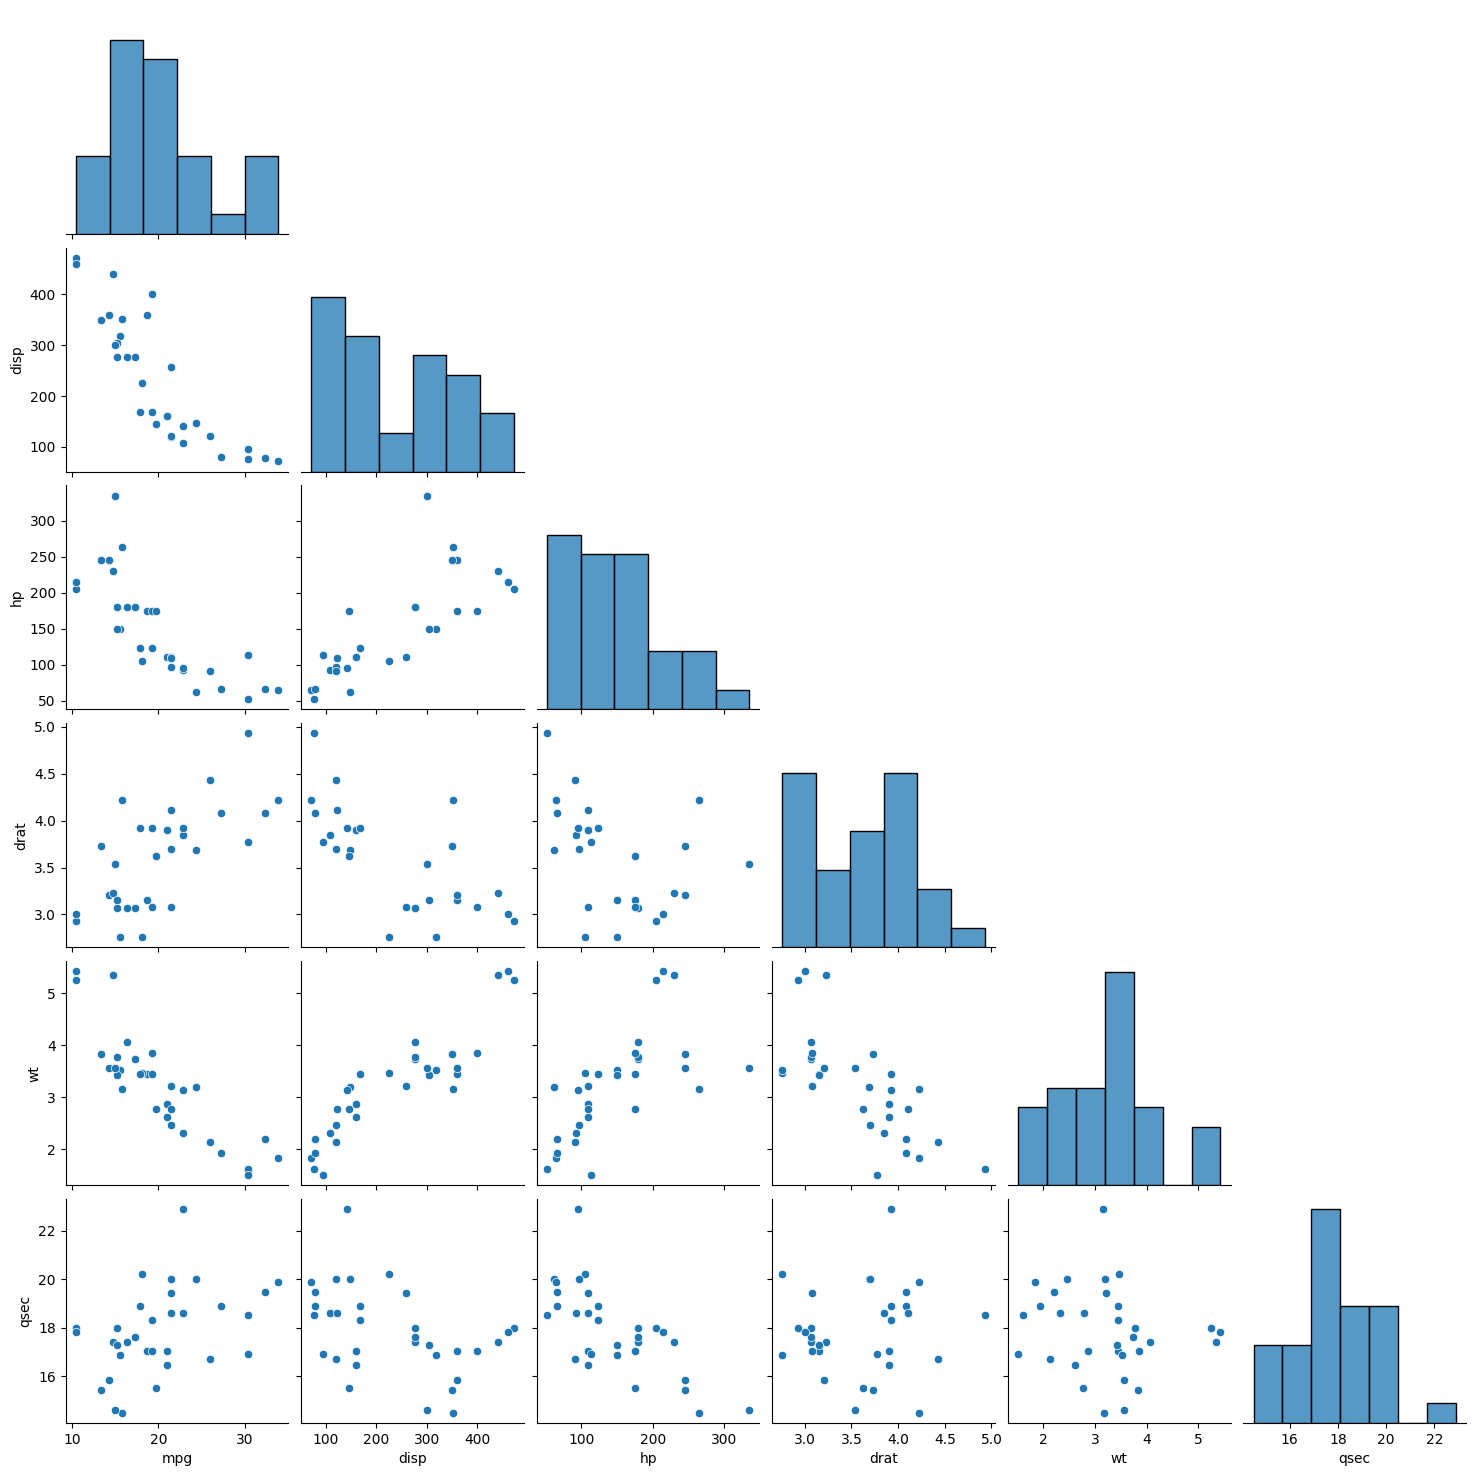

In [ ]:
# Combinaciones de pares de variables para inspeccionar posibles correlaciones

sns.pairplot(data, corner=True)
# sns.pairplot(data, kind='reg', corner=True)
plt.show()

In [ ]:
# Calculamos la correlacion entre pares de variables. Si alguna correlación es buena, entonces podriamos construir un modelo
correlation = data.corr()
correlation


,mpg,disp,hp,drat,wt,qsec
mpg,1.000000,-0.847551,-0.776168,0.681172,-0.867659,0.418684
disp,-0.847551,1.000000,0.790949,-0.710214,0.887980,-0.433698
hp,-0.776168,0.790949,1.000000,-0.448759,0.658748,-0.708223
drat,0.681172,-0.710214,-0.448759,1.000000,-0.712441,0.091205
wt,-0.867659,0.887980,0.658748,-0.712441,1.000000,-0.174716
qsec,0.418684,-0.433698,-0.708223,0.091205,-0.174716,1.000000


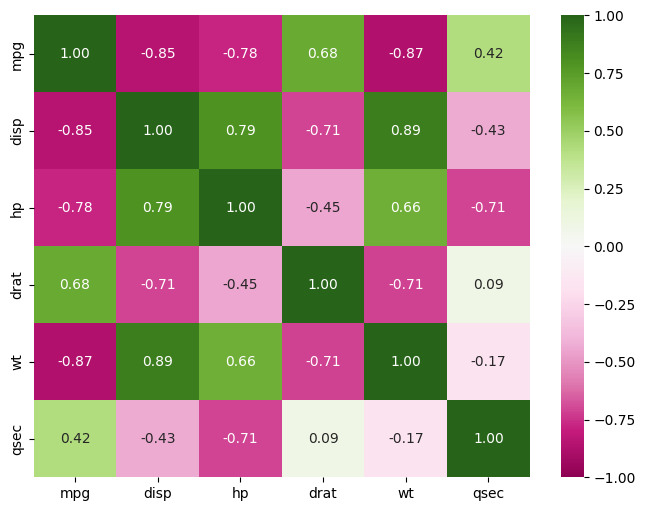

In [ ]:
# Visualizacion alternativa de la correlacion como heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='PiYG')
plt.show() # Hay varias correlaciones fuertes, tanto positivas como negativas

## **Modelo de regresion lineal (*statsmodel*)**

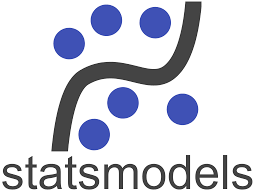

In [ ]:
x = data['disp'] # data['drat'] # data['disp'] # Cilindrada
y = data['mpg'] # data['wt'] # data['mpg']
# mpg (y) es una funcion lineal de disp (x)

x1 = sm.add_constant(x)
olsmod = sm.OLS(y, x1).fit()
print(olsmod.summary())

# Notar que tanto wt como const(intercept) son significativos, pues su p<0.05

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Tue, 06 May 2025   Prob (F-statistic):           9.38e-10
Time:                        00:17:26   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.5999      1.230     24.070      0.0

In [ ]:
# Grafico para ver los valores reales y predichos por el modelo
def plot(x, y, y_pred):
  plt.scatter(x, y, color='red', label="actual")
  plt.scatter(x, y_pred, label="predicted")
  plt.plot(x, y_pred)

  #plt.title("TBD")
  #plt.legend(loc="upper left")
  plt.legend()

  plt.show()

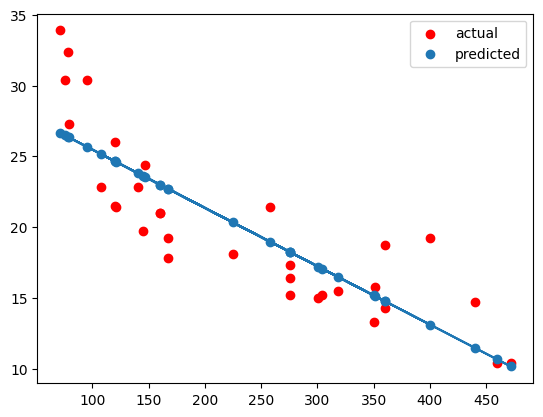

In [ ]:
y_pred = olsmod.predict(x1)
plot(x, y, y_pred)

### **Condiciones (supuestos) de la regresion lineal**


**1. Residuos sin estructura y media cero.**

In [ ]:
residuals = abs(y - y_pred)
#print('residuals:', residuals)
print("media=", np.mean(residuals))
print("desvio estandar=", np.std(residuals))

media= 2.605473485761071
desvio estandar= 1.7671210923602063


In [ ]:
print("Media de residuos= ", np.mean(olsmod.resid))
print("Desvio standard de residuos=", np.std(olsmod.resid))

Media de residuos=  -1.4210854715202004e-14
Desvio standard de residuos= 3.1482072740002796


In [ ]:
# Promedio de los residuos del modelo
np.mean(olsmod.resid), np.std(olsmod.resid)

(np.float64(-1.4210854715202004e-14), 3.1482072740002796)

Media de residuos:  2.605473485761071


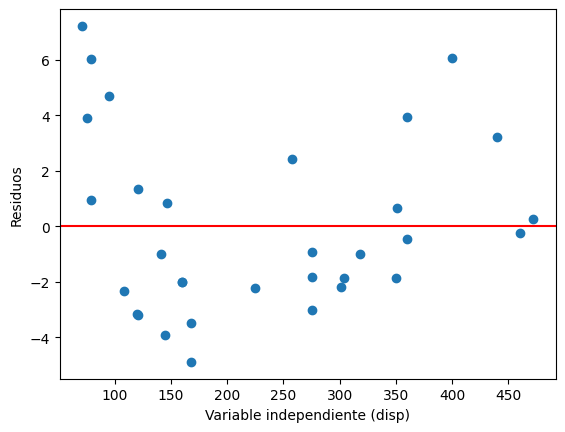

In [ ]:
# Podemos hacer también un plot manual de la distribucion de los residuos
#residuals = y - y_pred
print("Media de residuos: ", np.mean(residuals))

plt.scatter(y=olsmod.resid, x=x)
plt.axhline(y=0.0, color='r', linestyle='-')
# plt.axvline(x=200.0, color='b', linestyle='-')
plt.ylabel('Residuos')
plt.xlabel('Variable independiente (disp)')
plt.show() # Se ve que la distribucion es bastante aleatoria

**2. Normalidad de los residuos.**

**QQPlot**: Este tipo de gráfico se usa para determinar si un conjunto de datos sigue una distribucion normal

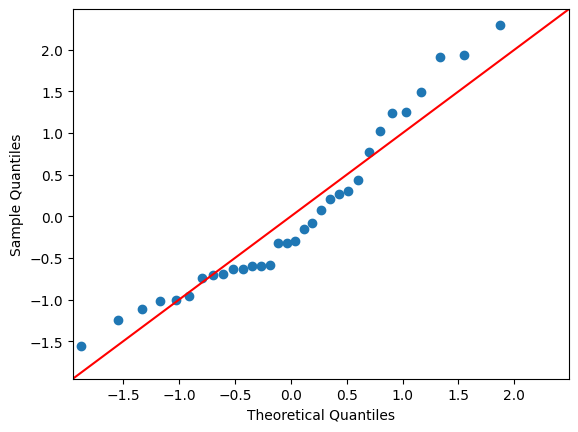

In [ ]:
#test = np.random.normal(0,1, 1000)
#test = np.random.uniform(0,1, 1000)

#sm.qqplot(test, line='45', fit=True)
sm.qqplot(olsmod.resid, line='45', fit=True) # Por defecto compara contra una distribucion normal estandarizada
pylab.show()

**Test Shapiro-Wilk (normalidad)**: La hipotesis nula H0 es que la muestra sigue una distribucion normal (aceptada si p-value<0.05). La hipotesis alternativa Ha es que la muestra no viene de una distribucion normal. Si se rechaza H0, entonces los residuos no son normales.

In [ ]:
# Aplicamos el Shapiro-Wilk test
from scipy.stats import shapiro
shapiro(residuals)

# 1) Since the p-value is not less than .05, we fail to reject the null hypothesis (H0: data comes from a normal distribution).
# We do not have sufficient evidence to say that the sample data does not come from a normal distribution.

# 2) Since the p-value is less than .05, we reject the null hypothesis (H0: data comes from a normal distribution).
# We have sufficient evidence to say that the sample data does not come from a normal distribution.

ShapiroResult(statistic=np.float64(0.931753020376291), pvalue=np.float64(0.04383331512527765))

**3. Homocedasticidad**. Esto significa que la varianza se mantiene constante.

**Test Breusch-Pagan (homoscedasticity)**: La hipotesis nula H0 es que existe homoscedasticity. La hipotesis alternativa Ha es que no hay homoscedasticity (sino que hay heteroscedasticity). Si p-value>=0.05, no podemos rechazar la hipotesis nula.

In [ ]:
# Aplicamos Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
test = smf.het_breuschpagan(olsmod.resid, olsmod.model.exog)
lzip(names, test)

# If p-value is not less than 0.05, we fail to reject the null hypothesi (H0: homoscedasticity is present).
# We do not have sufficient evidence to say that heteroscedasticity is present in the regression model.

# If p-value is less than 0.05, we reject the null hypothesi (H0: homoscedasticity is present).
# We have sufficient evidence to say that homoscedasticity is not present in the regression model, so we conclude heteroscedasticity.

[('Lagrange multiplier statistic', np.float64(2.916374783142242)),
 ('p-value', np.float64(0.08768465766832)),
 ('f-value', np.float64(3.0082647139722667)),
 ('f p-value', np.float64(0.09310670540281078))]

**4. Autocorrelacion entre los residuos**. Esto significa que que el valor de un residuo condiciona el valor de los residuos cercanos.



**Test de Durbin-Watson (autocorrelacion)**: La hipotesis nula H0 es que no existe correlacion entre los residuos. La hipotesis alternativa Ha es que los residuos están autocorrelacionados.

El estadistico del test está en el rango [0-4], con la siguiente interpretacion:
* Si el estadistico está cercano a 0, hay mucha evidencia de correlacion serial positiva
* Si el estadistico está cercano a 4, hay mucha evidencia de correlacion serial negativa
* Normalmente, si el valor estadistico está entre 1.5 y 2.5 se considera normal. Si los valores están fuera de ese rango, indicaría que existen problemas de autocorrelacion


In [ ]:
# Aplicamos el Durbin-Watson test
durbin_watson(olsmod.resid)

np.float64(1.2503896870866509)

---

Dado que nuestro modelo parece significativo y valido, podemos utilizarlo para hacer predicciones. En particular, realizamos una predicción sobre valores arbitrarios de peso (*wt*)

In [ ]:
x_new = pd.Series([2.5, 2.9])
print('wt values:', list(x_new.values))
x1 = sm.add_constant(x_new)
pred = olsmod.predict(x1) # Predicciones para los datos adicionales
print('predictions of mpg:', list(pred))

wt values: [np.float64(2.5), np.float64(2.9)]
predictions of mpg: [29.496816956256996, 29.48033090827188]


## **Modelo de regresion lineal (*sklearn*)**

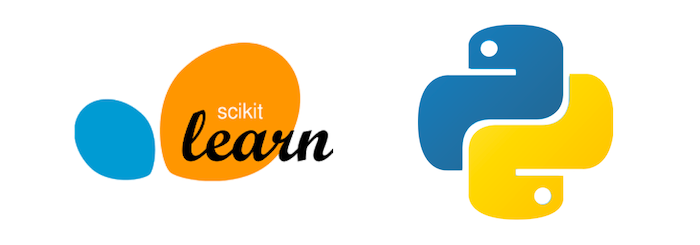

In [ ]:
x.values

array([160. , 160. , 108. , 258. , 360. , 225. , 360. , 146.7, 140.8,
       167.6, 167.6, 275.8, 275.8, 275.8, 472. , 460. , 440. ,  78.7,
        75.7,  71.1, 120.1, 318. , 304. , 350. , 400. ,  79. , 120.3,
        95.1, 351. , 145. , 301. , 121. ])

In [ ]:
x_reshaped = x.values.reshape(-1, 1)
lr_model = LinearRegression()
lr_model = lr_model.fit(x_reshaped,y)
print('coeficients:', lr_model.coef_)
print('intercept:', lr_model.intercept_)

y_pred = lr_model.predict(x_reshaped)

# Metricas de performance
r2 = r2_score(y, y_pred)
print("R2=", r2)
mse = mean_squared_error(y, y_pred)
print("RMSE=", np.sqrt(mse))

coeficients: [-0.04121512]
intercept: 29.599854756163946
R2= 0.7183433404897299
RMSE= 3.1482072740002796


In [ ]:
np.mean(y-y_pred)

np.float64(-2.1094237467877974e-15)

In [ ]:
def r2_adjusted_score(r2, x, y):
  #return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
  return 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)

print("R2adj=", r2_adjusted_score(r2, x_reshaped, y_pred))

R2adj= 0.7089547851727209


In [ ]:
print('wt values:', list(x_new.values))
x_reshaped = x_new.values.reshape(-1, 1) # Prediccion para valores arbitrarios
pred = lr_model.predict(x_reshaped)
print('predictions of mpg:', list(pred))

wt values: [np.float64(2.5), np.float64(2.9)]
predictions of mpg: [np.float64(29.496816956256982), np.float64(29.480330908271867)]


---

## **Extra: Outliers**

In [ ]:
# https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

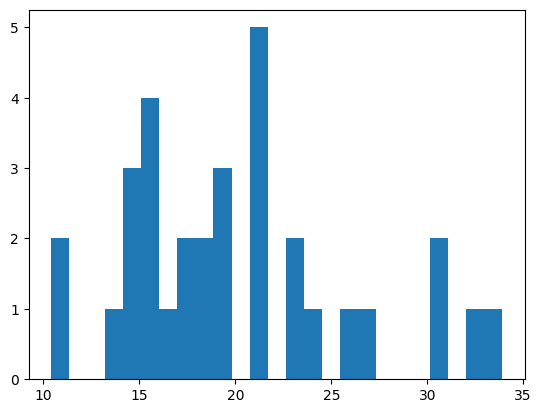

In [ ]:
data['mpg'].hist(bins=25)
plt.grid(False)
plt.show()

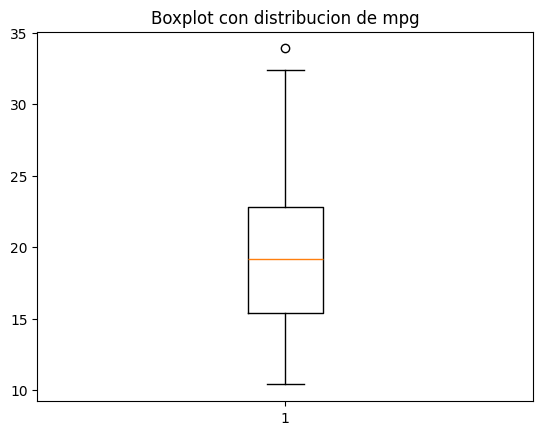

In [ ]:
#plt.boxplot(y)
plt.boxplot(data['mpg'])
plt.title("Boxplot con distribucion de mpg")
plt.show()

### **Metodo del IQR (Rango intercuartil)**

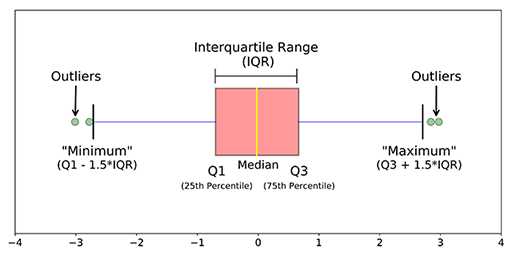

In [ ]:
# Metodo del IQR
print("IQR ====")
percentile25 = data['mpg'].quantile(0.25)
percentile75 = data['mpg'].quantile(0.75)
print('q25=', percentile25, 'q75=', percentile75)
iqr = percentile75 - percentile25
print('IQR=', iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("upper:", round(upper_limit,3), "lower:", round(lower_limit,3))

IQR ====
q25= 15.425 q75= 22.8
IQR= 7.375
upper: 33.862 lower: 4.363


### **Metodo del Z-score**

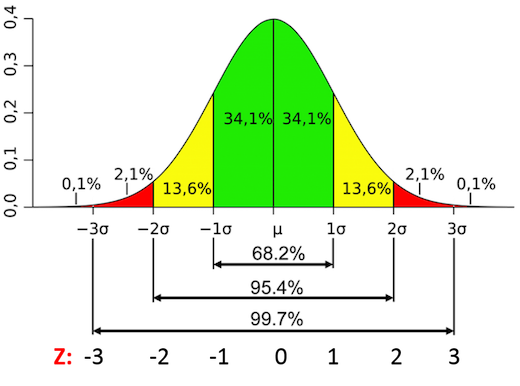

In [ ]:
# Metodo del Z-score (2)
print("Z-score ====")
upper_limit = data['mpg'].mean() + 2* data['mpg'].std()
lower_limit = data['mpg'].mean() - 2* data['mpg'].std()
print("upper:", round(upper_limit,3), "lower:", round(lower_limit,3))

Z-score ====
upper: 32.145 lower: 8.037


Calculamos los valores outliers (indpendientemente del metodo usado), y luego volvemos a graficar el boxplot

In [ ]:
mpg_outliers = [x for x in data['mpg'] if x < lower_limit or x > upper_limit]
mpg_outliers

[32.4, 33.9]

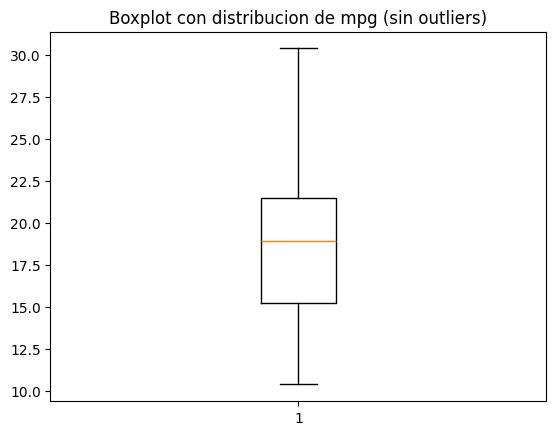

In [ ]:
y_no_outliers = [x for x in y if x not in mpg_outliers]
plt.boxplot(y_no_outliers)
plt.title("Boxplot con distribucion de mpg (sin outliers)")
plt.show()

---

## **Ejercicio 1**
*   Realizar una regresión lineal para otro par de variables del **mismo** dataset (*mtcars*).
*   Elegir *statsmodel* o bien *sklearn*
*   Analizar métricas de performance del modelo
*   Analizar las condiciones (supuestos) de la regresion

In [ ]:
# TODO:

x = data['wt']
y = data['mpg']
# mpg (y) es una funcion lineal de wt (x)

x1 = sm.add_constant(x)
olsmod = sm.OLS(y, x1).fit()
print(olsmod.summary())



                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.29e-10
Time:                        21:26:09   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.0

---

## **Ejercicio 2**

*   Realizar una regresión lineal para un par de variables de un dataset **distinto** (*housing*).
*   Inicialmente, realizar una visualizacióne exploratoria
*   Elegir *statsmodel* o bien *sklearn*
*   Analizar métricas de performance del modelo
*   Analizar las condiciones (supuestos) de la regresion


In [ ]:
url1 = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing_df = pd.read_csv(url1)
print(housing_df.shape)
housing_df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


* *longitude*: A measure of how far west a house is; a higher value is
farther west
* *latitude*: A measure of how far north a house is; a higher value is farther north
* *housing_median_age*: Median age of a house within a block; a lower number is a newer building
* *total_rooms*: Total number of rooms within a block
* *total_bedrooms*: Total number of bedrooms within a block
population: Total number of people residing within a block
* *households*: Total number of households, a group of people residing within a home unit, for a block
* *median_income*: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
* *median_house_value*: Median house value for households within a block (measured in US Dollars)
* *ocean_proximity*: Location of the house w.r.t ocean/sea

In [ ]:
# Tomamos una muestra (para que no sea tan costoso en computo)
housing_df = housing_df.sample(5000)
housing_df.shape

(5000, 10)

In [ ]:
# TODO:

---